In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\DATA SCIENCE\\Projects\\Airline Customer Satisfaction\\Dataset\\train.csv")
pd.set_option('display.max_columns' , 100) # isse sare columns dikhenge
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Exploration , Cleaning and Handling

In [3]:
df.shape

(103904, 25)

In [4]:
# Removing unique or unnecessary columns
df=df.drop('Unnamed: 0', axis=1)

In [5]:
df=df.drop('id' , axis=1)

In [6]:
len(df.columns)

23

In [7]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df.duplicated().sum()
# no duplicate values

0

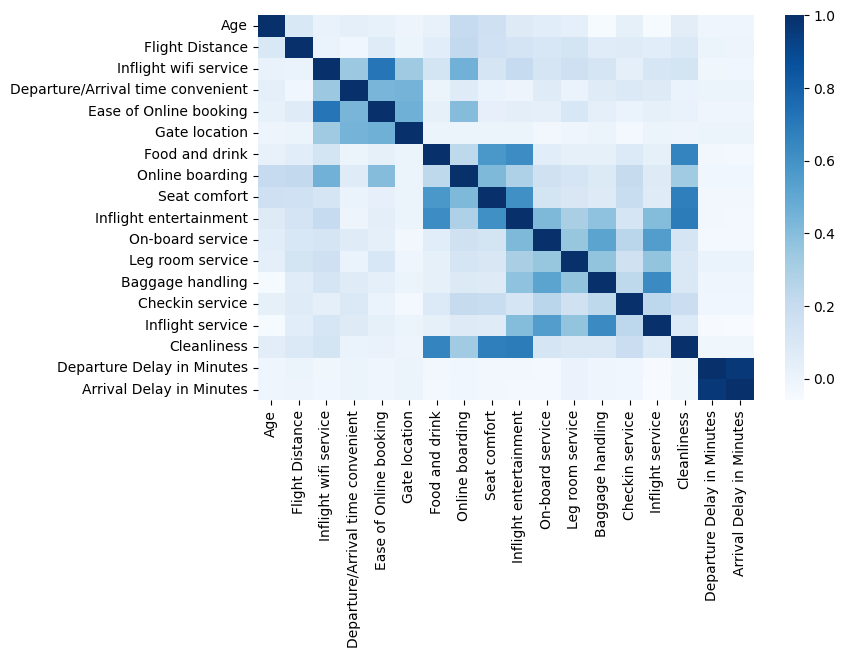

In [9]:
# Finding Correaltion for numberical features
numeric_df = df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr , cmap='Blues')
plt.show()

In [10]:
# Departure Delay and Arrival Delay : highly correlated -- If a flight deaprts late , it is likely to arrive late as well

In [11]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Insights
 Arrival Delay Column:
     the minimum arrival delay is 0 (indicating no delay)
     the maximum arriving delay is 1584 min

Flight Distance Column:
    The shortest flight distance in the dataset is 31min ( suspicious)
    The longest flight distance in the dataset is 4983

Departure Delay Column:
    The minimum departure delay is 0.
    The maximum departure delay is 1592

Note :- There appears to be outliers in the data as there is a significant difference between the third Quantile(Q3 or 75%) and the maximum value

In [14]:
numerical.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

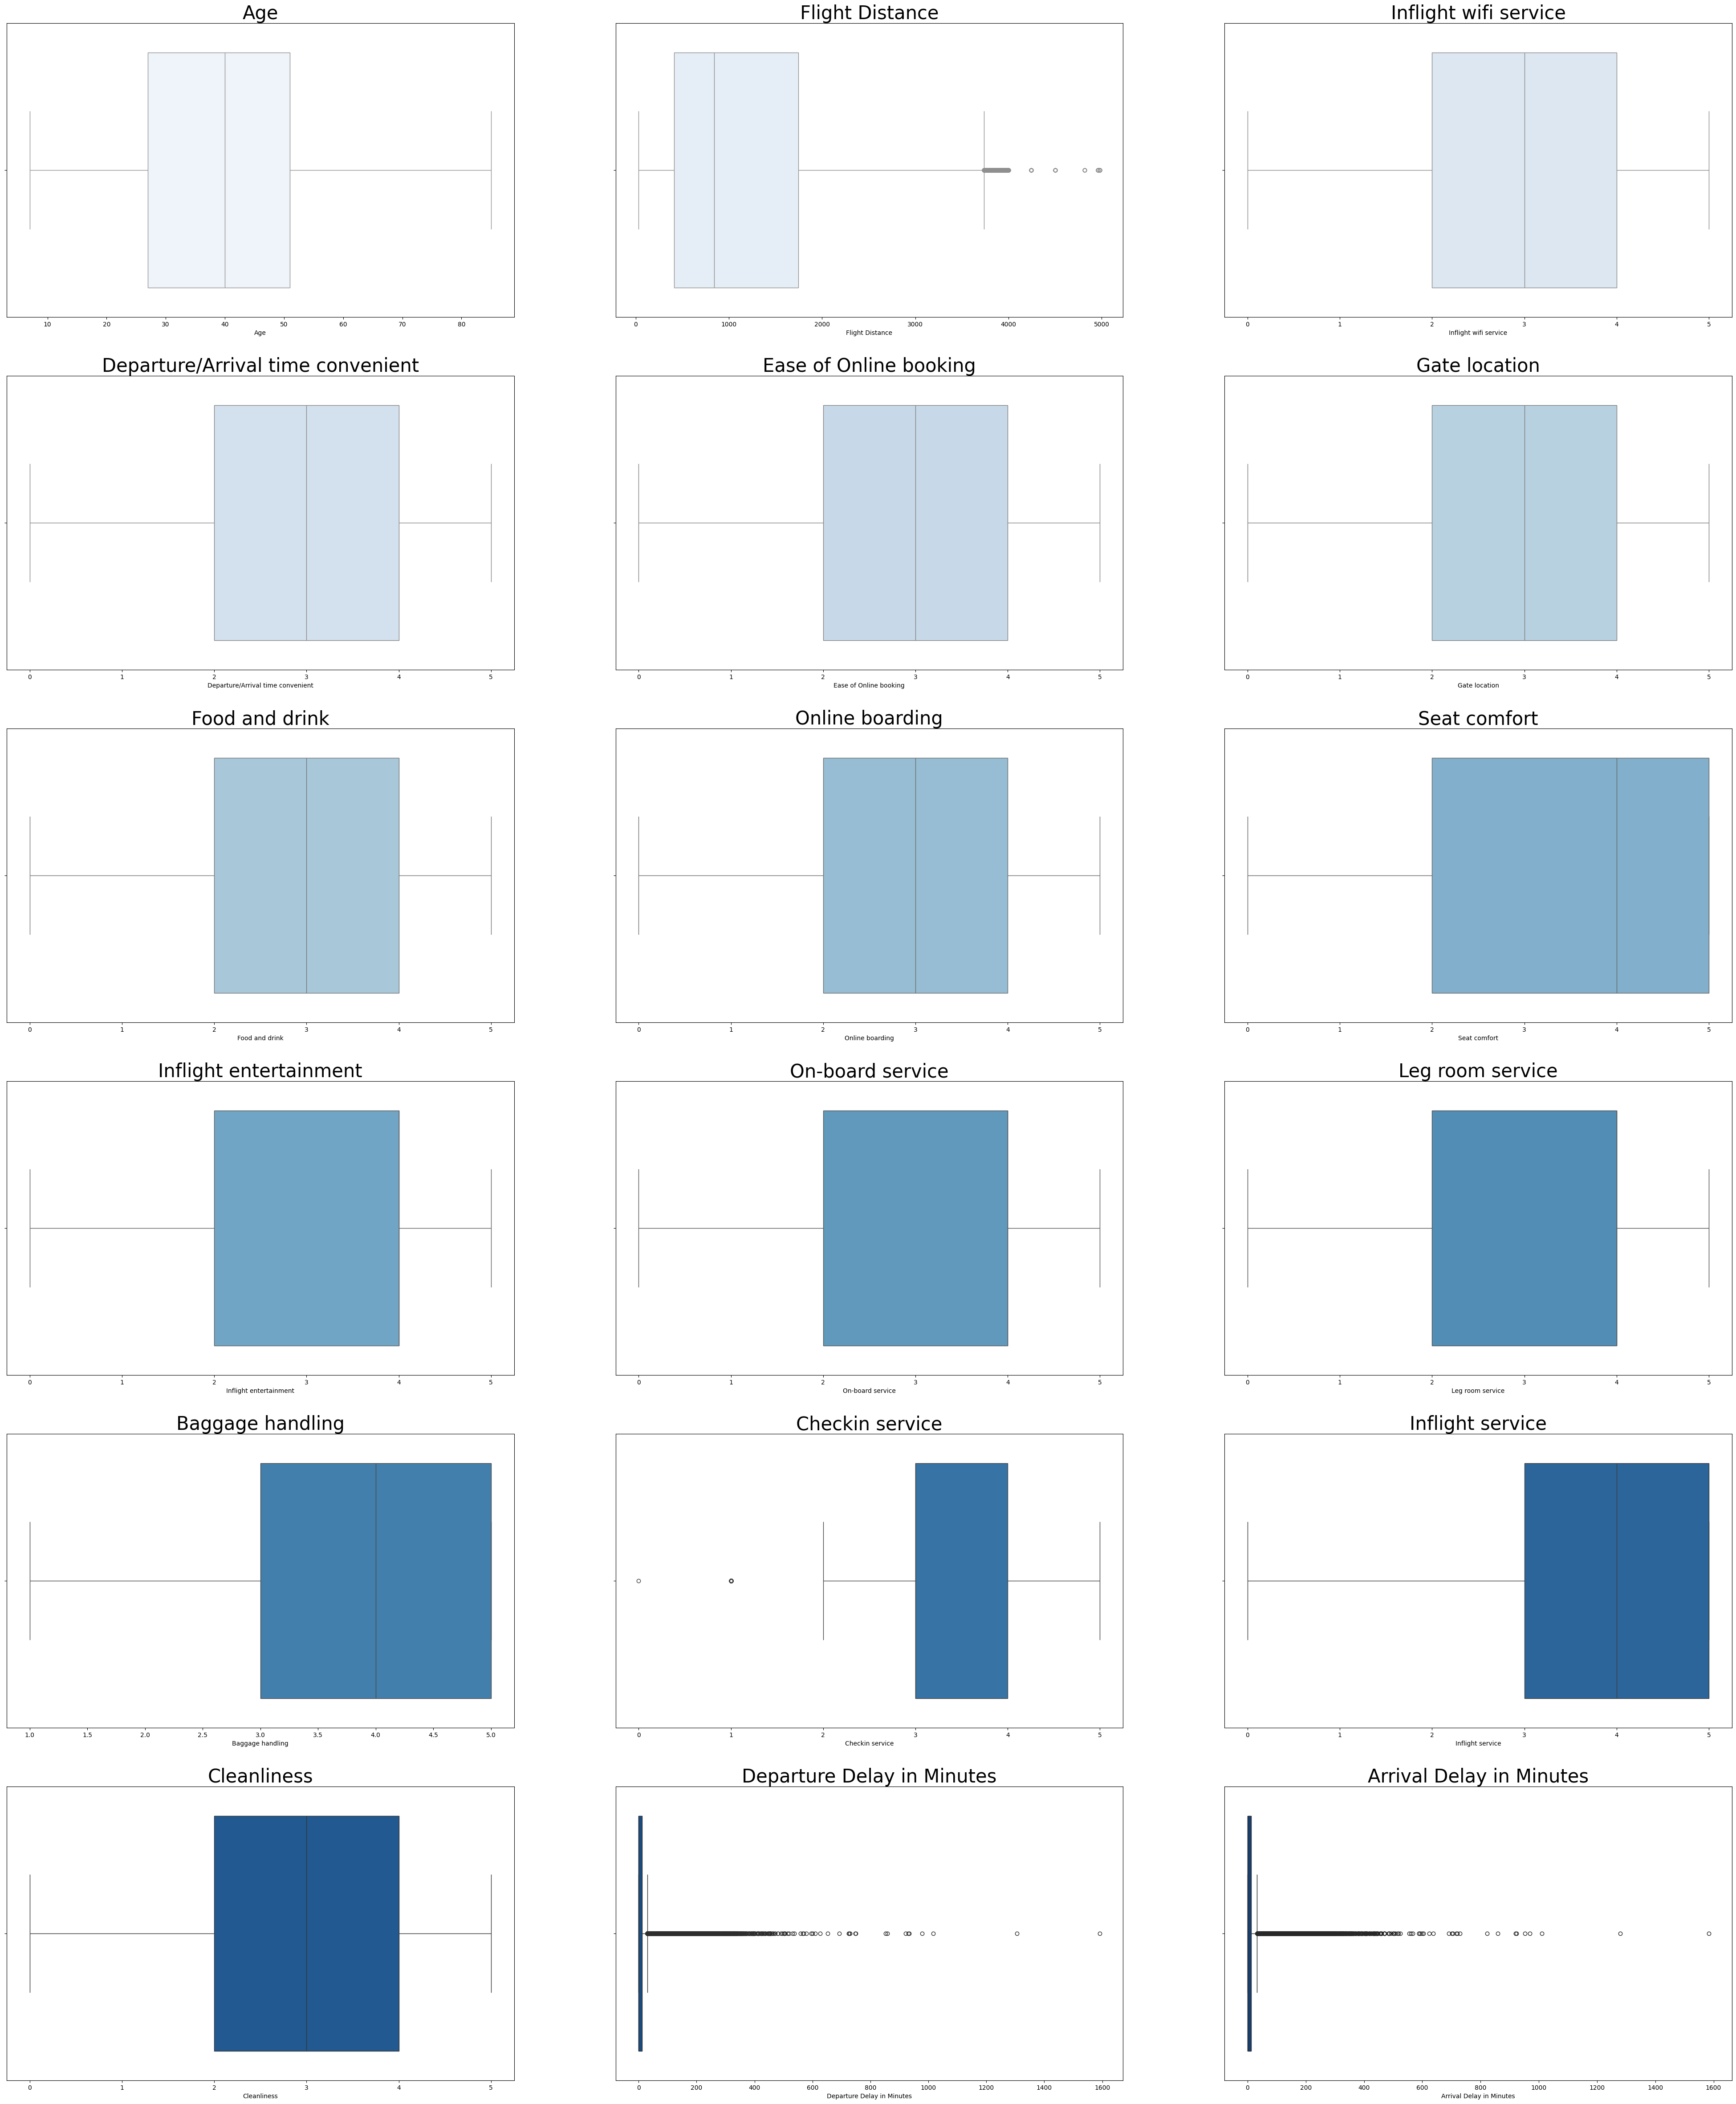

In [13]:
# Checking for outliers
numerical = df.select_dtypes(include=['int' , 'float'])
blue_palette = sns.color_palette("Blues" , n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3,figsize=(50,60))
axes = axes.flatten()

for i , col in enumerate(numerical.columns):
    sns.boxplot(x=df[col] , ax=axes[i] , color = blue_palette[i])
    axes[i].set_title(col,fontsize=30)

plt.show()

In [15]:
# After Checking from graph We know these columns have outliers:

# 1.) Departure Delay ( too much)
# 2.) Arrival Delay ( too much)
# 3.) Check-In service ( very less)
# 4.) Flight Distance ( Moderate)

In [18]:
# Handle Outliers
def handle_outliers(df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df[column] = df[column].clip(lower=lower_bound , upper = upper_bound)

    return df

columns_to_handle = ['Flight Distance' , 'Departure Delay in Minutes' , 'Arrival Delay in Minutes' , 'Checkin service']
df = handle_outliers(df,columns_to_handle)

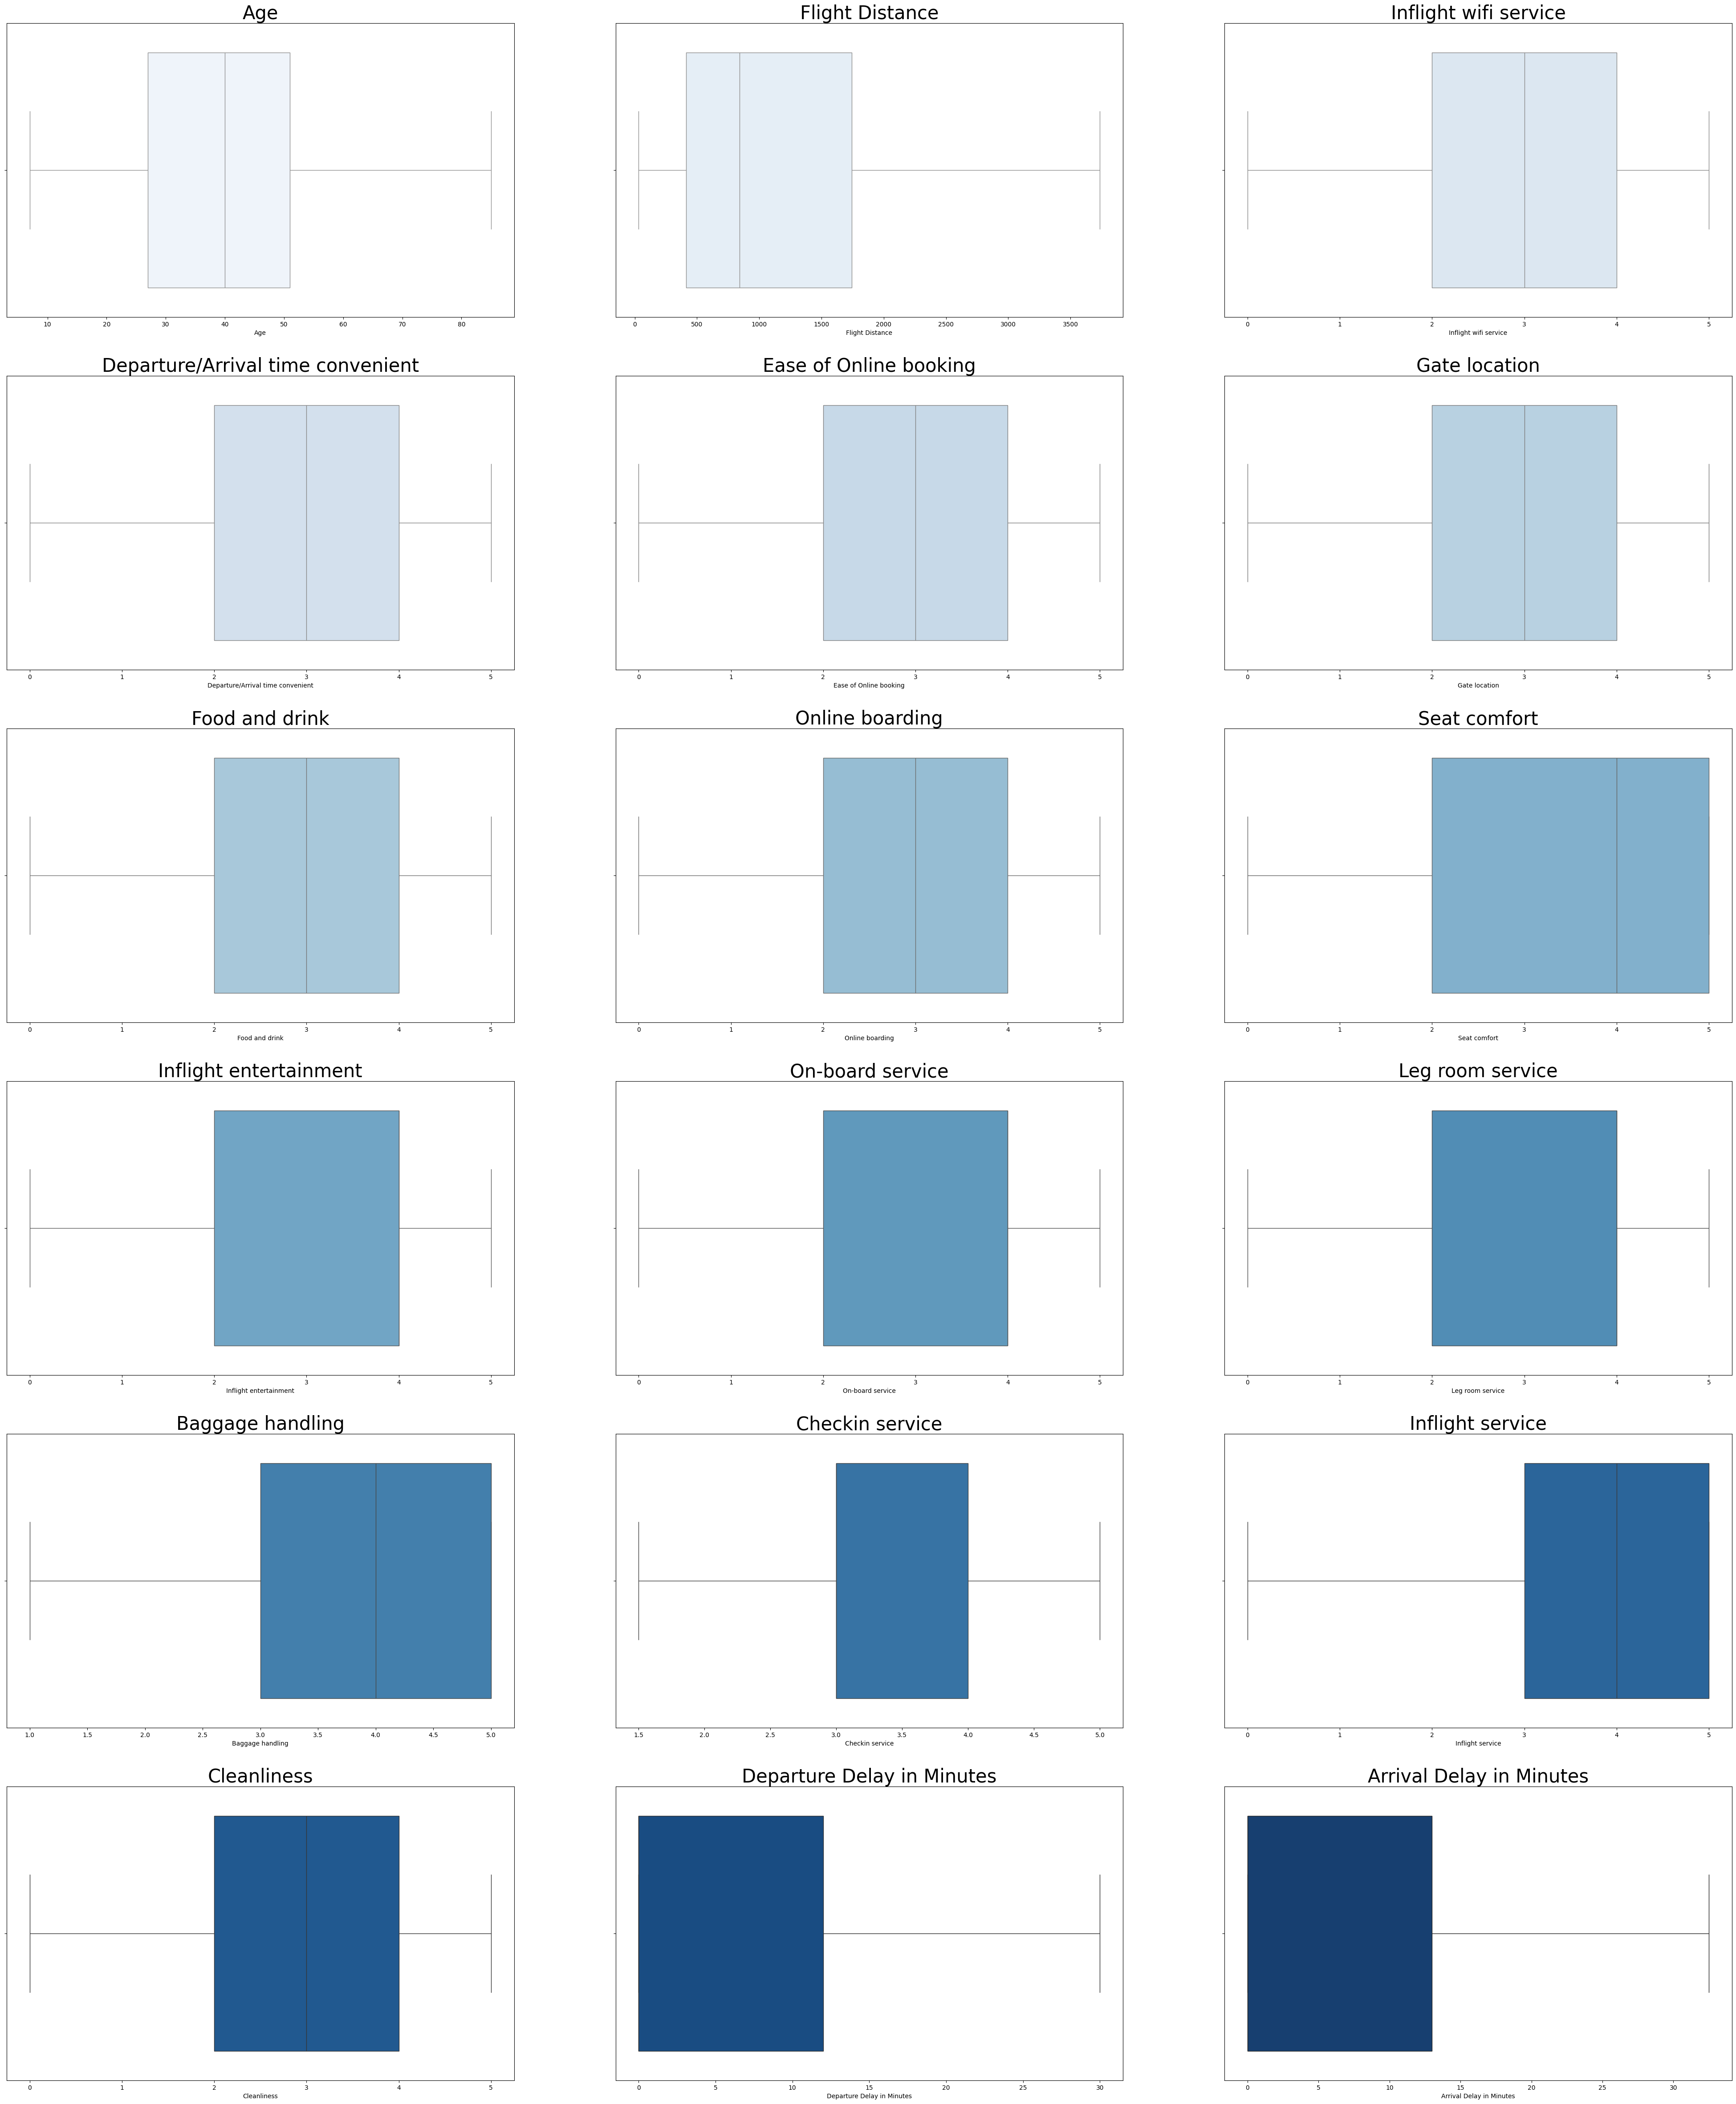

In [19]:
# Checking ki Outliers Handle hue ya nahi
numerical = df.select_dtypes(include=['int' , 'float'])
blue_palette = sns.color_palette("Blues" , n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3,figsize=(50,60))
axes = axes.flatten()

for i , col in enumerate(numerical.columns):
    sns.boxplot(x=df[col] , ax=axes[i] , color = blue_palette[i])
    axes[i].set_title(col,fontsize=30)

plt.show()

In [20]:
# Handle Null values of Arrival Delay in Minutes
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [21]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# EDA

In [23]:
# Original dataset kharab nahi ho isliye new_df banaya
new_df = df.copy()
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [26]:
df['Gender'].nunique()

2

In [27]:
# Isse pata chalega ki konse columns mai 6 unique categories hai
# Jese Gender mai 2 hai Male aur Female
columns_with_six_categories = new_df.columns[new_df.nunique()==6]
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [29]:
new_df['Seat comfort'].value_counts()

Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64

In [35]:
ordinal_mapping = {
    0: 'Very Poor',
    1: 'Poor', 
    2: 'Average',
    3: 'Good',
    4: 'Excellent',
    5: 'Outstanding'
}
# Seat Comfort mai jo 0 hai wo replace hojaega very poor se 1 hojaega Poor se & so on...

In [36]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap(lambda x:ordinal_mapping.get(x,x))

In [37]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,4,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,3,1.5,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,4,4.0,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,3,1.5,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,4,3.0,Good,Good,0,0.0,satisfied


In [38]:
# Bagging Handling aur Checkin Service convert nahi hue kyuki isme 5 hi categories hai not 6
df['Baggage handling'].value_counts()
# baggage handling does not have any zeroes thats why we will need another mapping for it

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64

In [40]:
mapping = {
    1: 'Very Poor',
    2: 'Poor', 
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}
new_df['Baggage handling'] = new_df['Baggage handling'].apply(lambda x: mapping.get(x,x))

In [43]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Good,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [45]:
df['Checkin service'].value_counts()
# It also needs other type of mapping

Checkin service
4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.5    12891
Name: count, dtype: int64

In [46]:
mapping_new = {
    1.5: 'Very Poor',
    2.0: 'Poor', 
    3.0: 'Average',
    4.0: 'Good',
    5.0: 'Excellent'
}
new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x:mapping_new.get(x,x))
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Good,Good,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


# Now Data is Set For EDA

In [48]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Univariate EDA

In [50]:
numerical_columns = ['Age' , 'Flight Distance' , 'Departure Delay in Minutes' , 'Arrival Delay in Minutes']

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class' , 'Inflight wifi service' ,
                       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',
       'satisfaction']

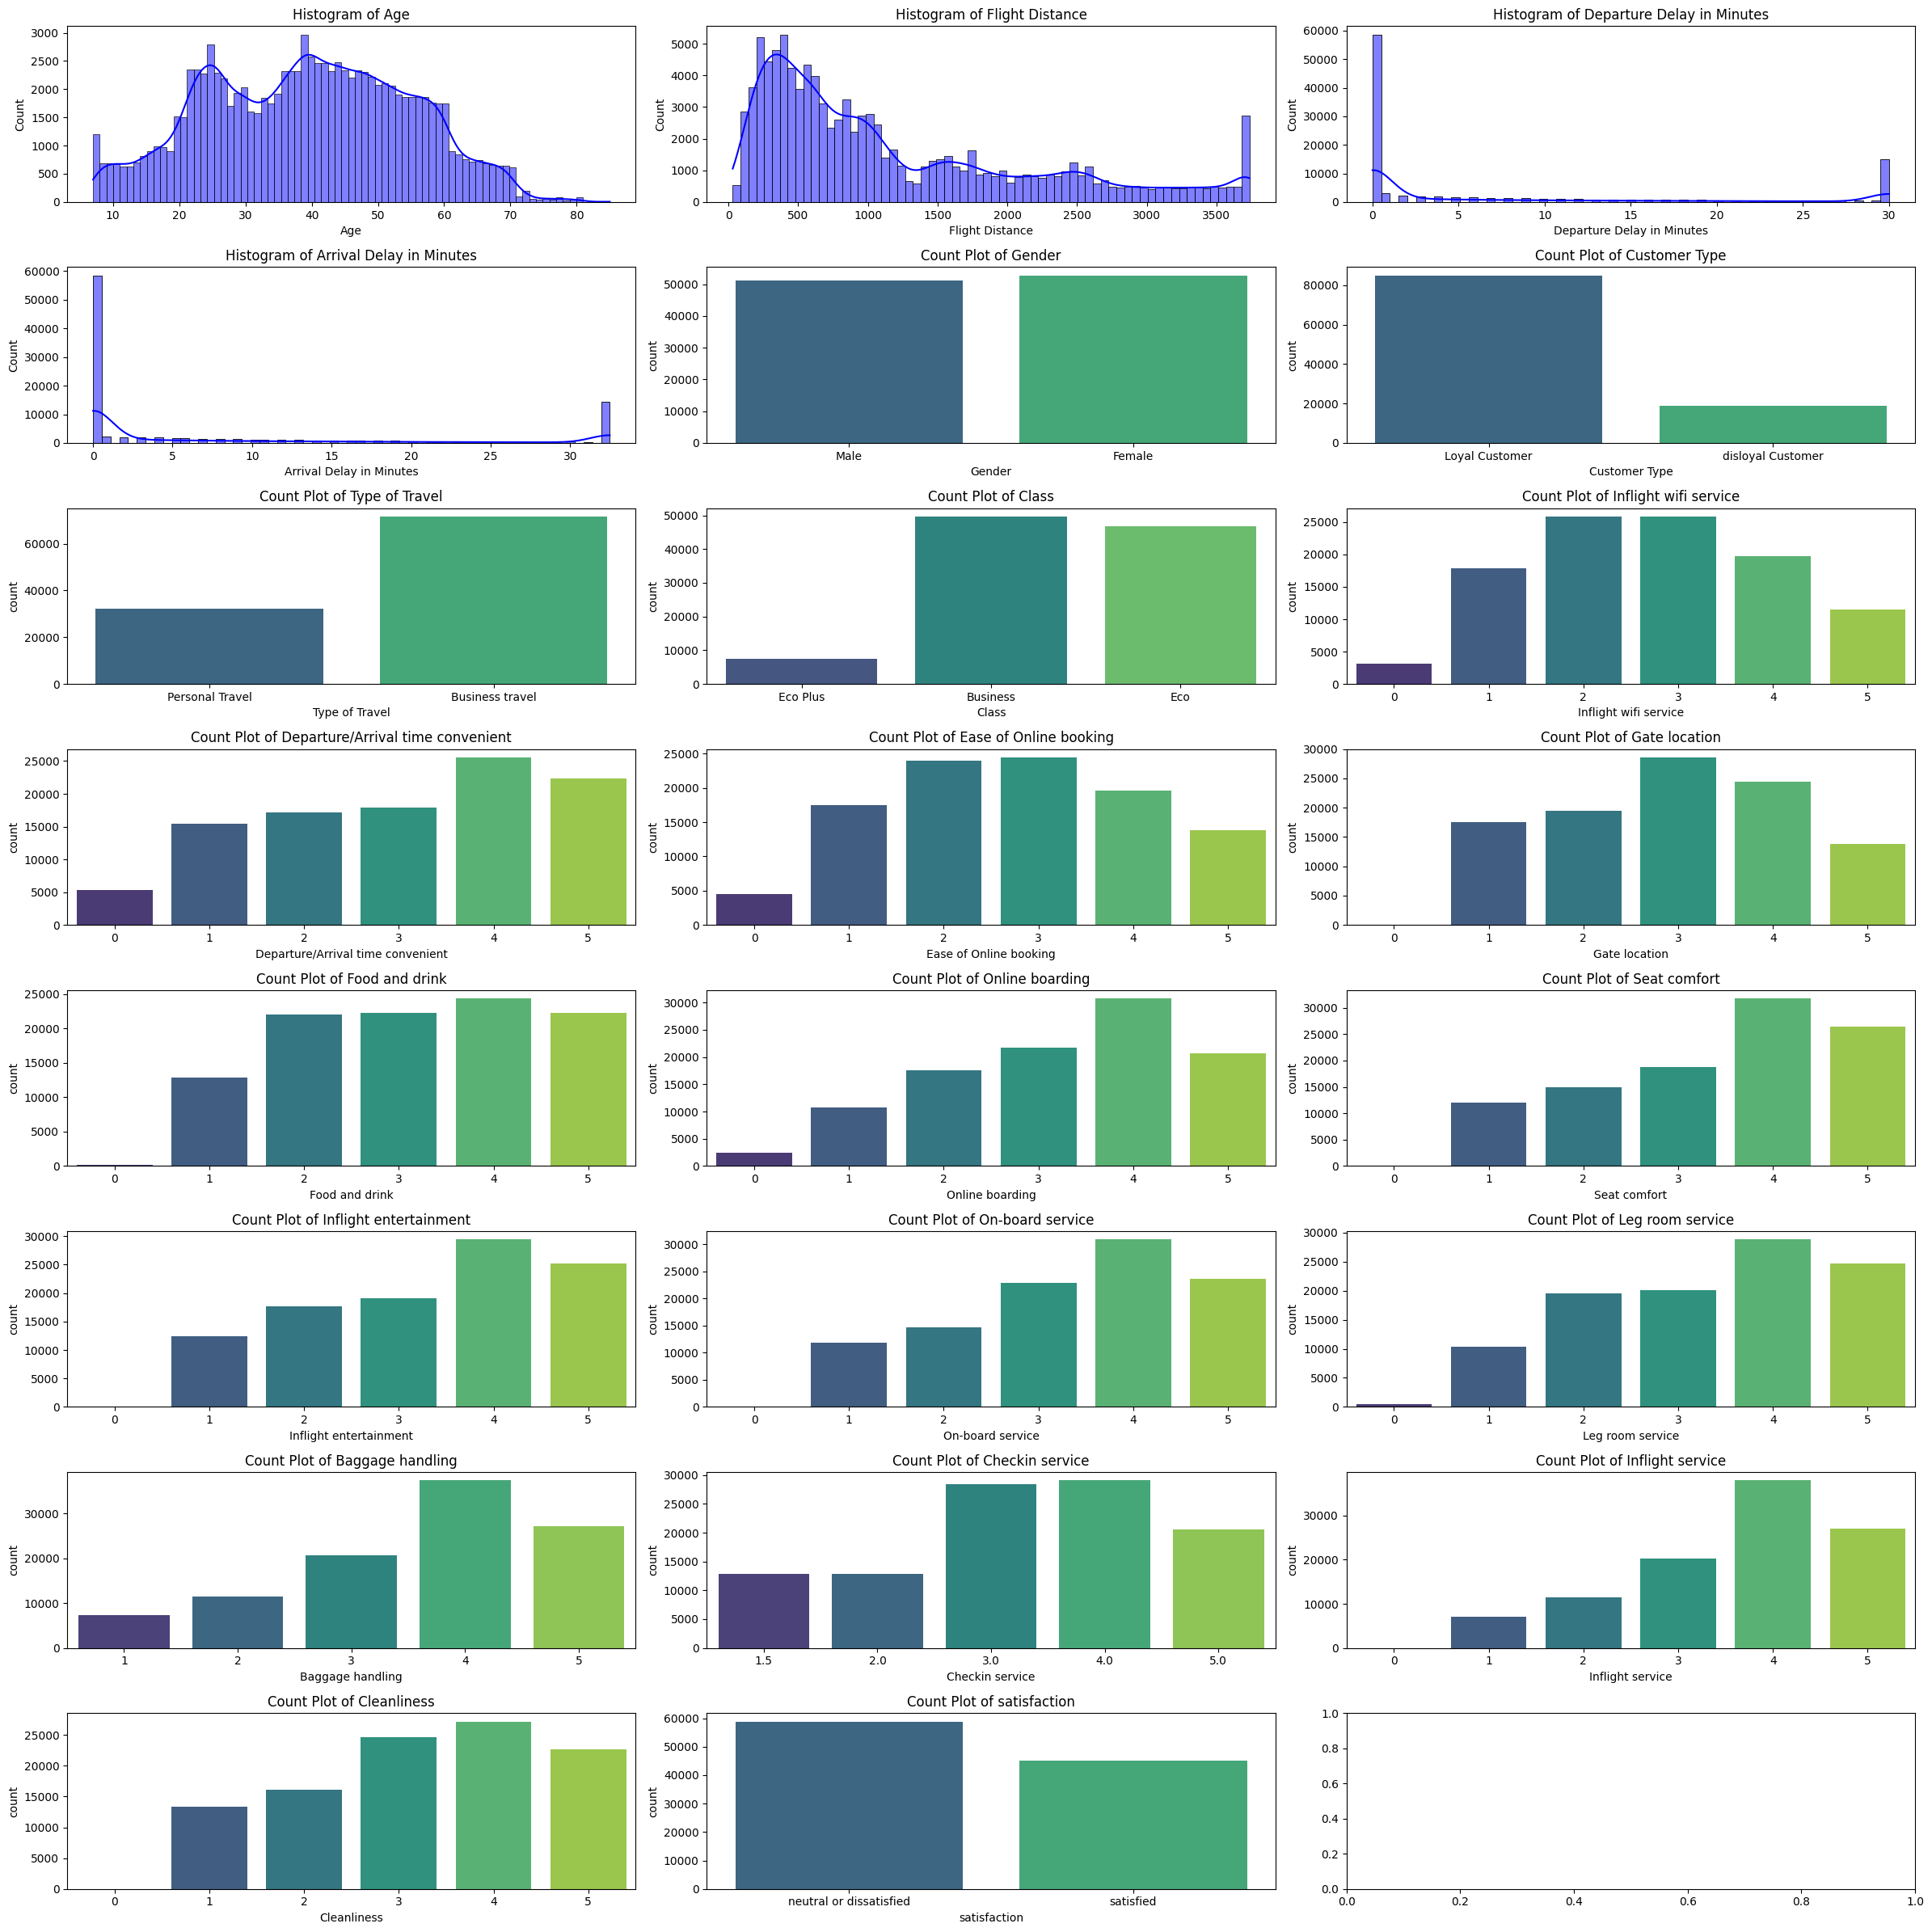

In [53]:
fig , axes = plt.subplots(nrows=8 , ncols=3 , figsize = (24,24))
axes = axes.flatten()

for i , col in enumerate(numerical_columns):
    sns.histplot(df[col] ,kde=True , ax=axes[i] , color='blue')
    axes[i].set_title(f'Histogram of {col}')

# Plot Bar plots for categorical features
for j , col in enumerate(categorical_columns):
    if i + 1 + j <len(axes):
        sns.countplot(x=df[col] , ax=axes[i+1+j] , palette = 'viridis')
        axes[i+1+j].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

## BiVariate EDA

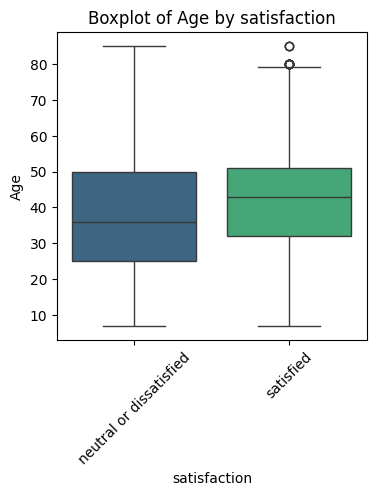

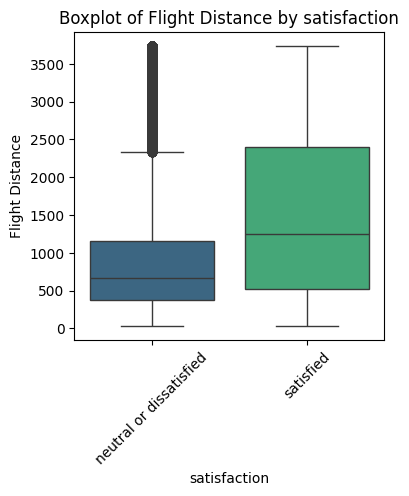

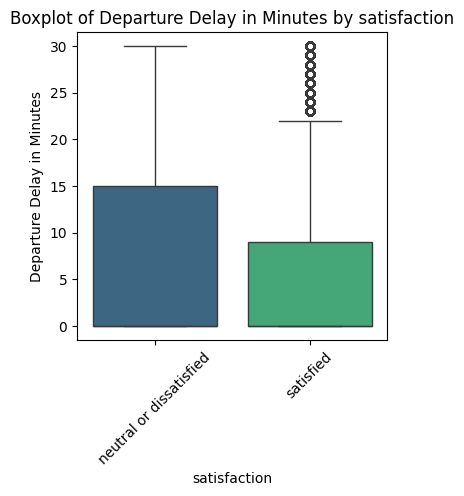

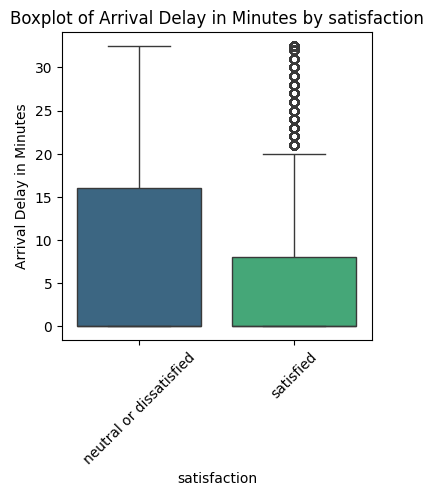

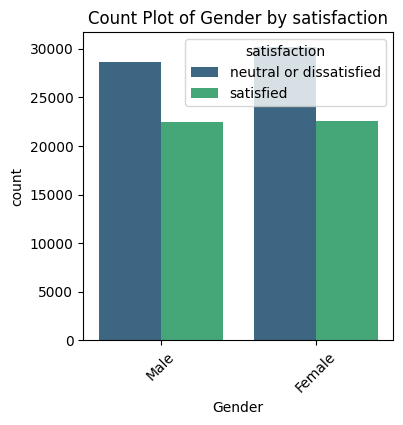

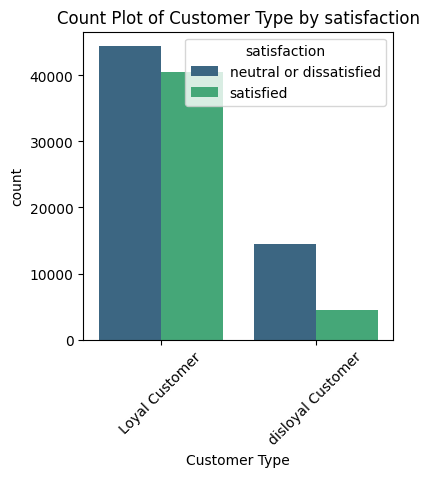

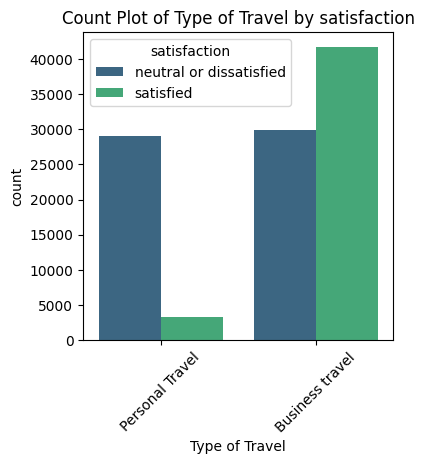

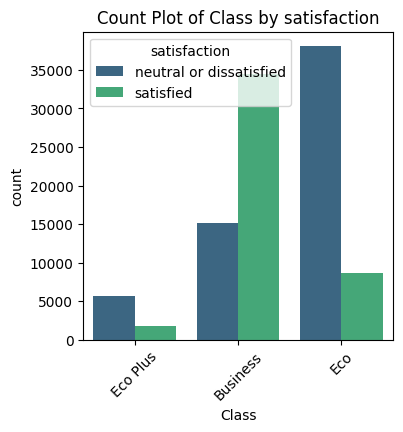

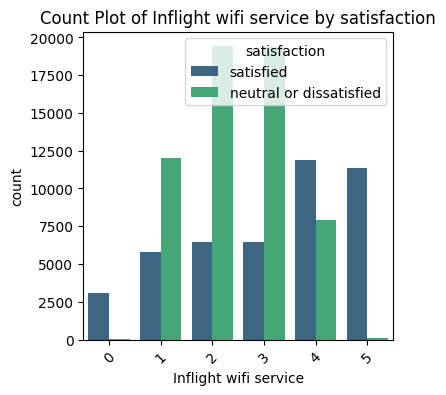

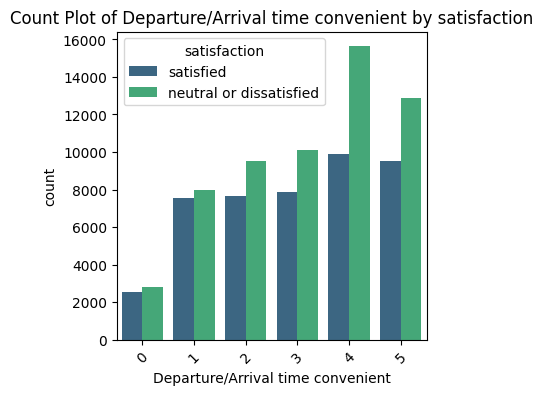

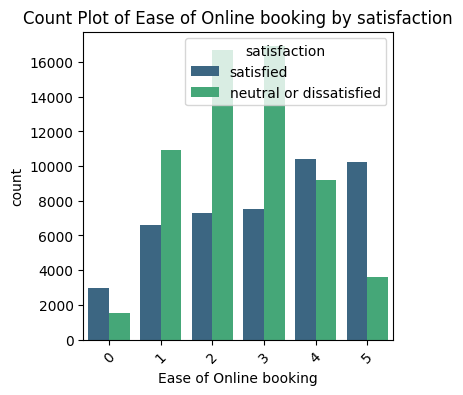

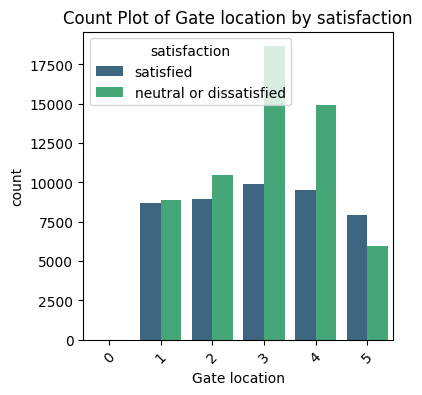

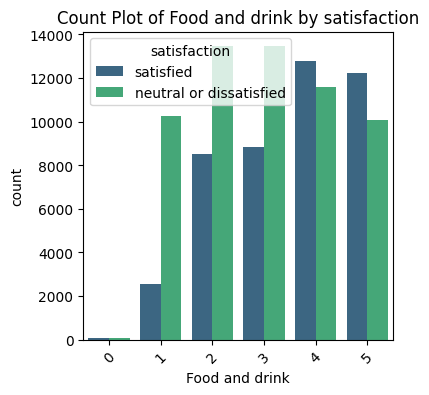

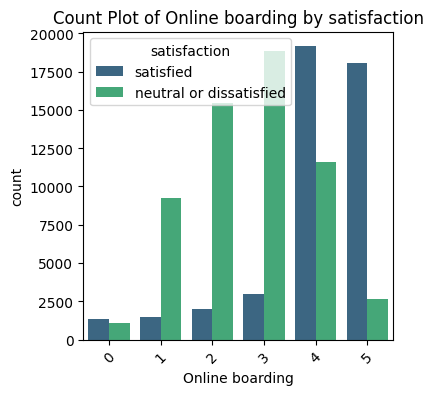

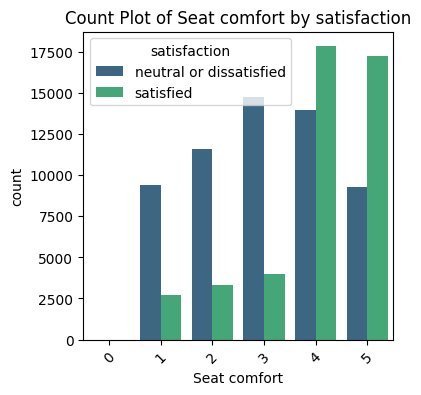

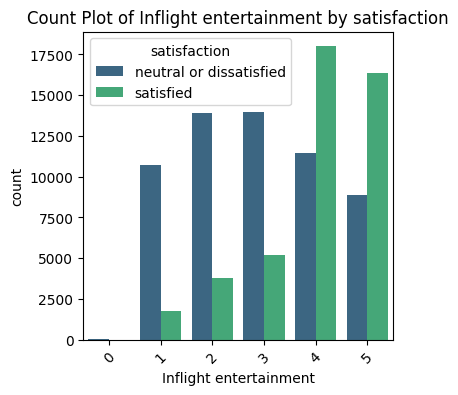

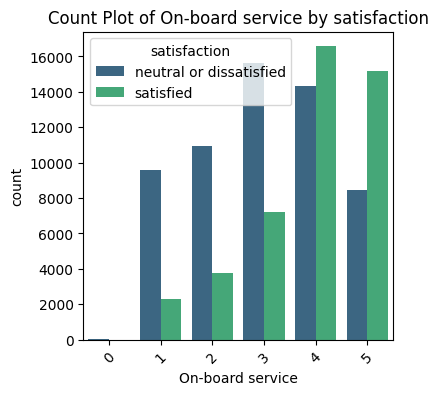

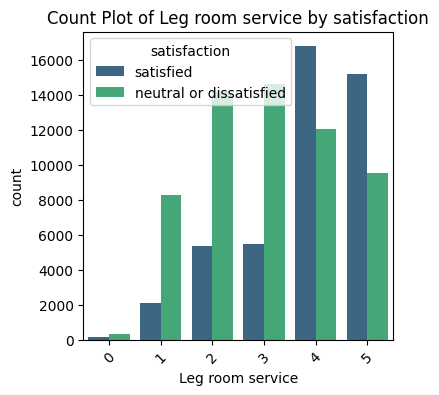

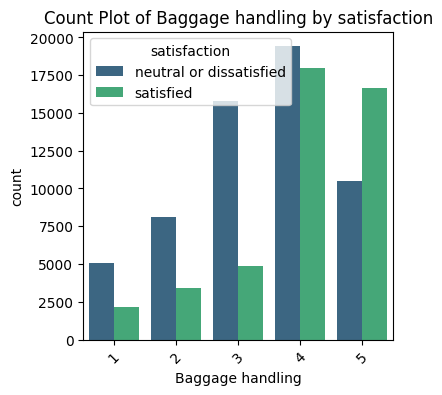

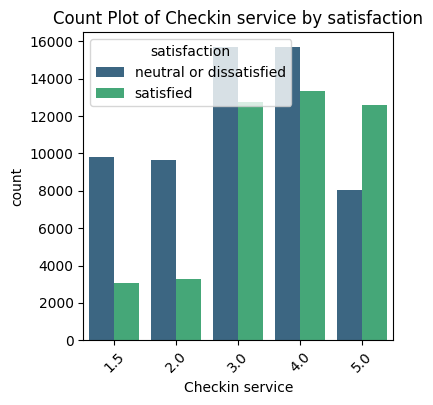

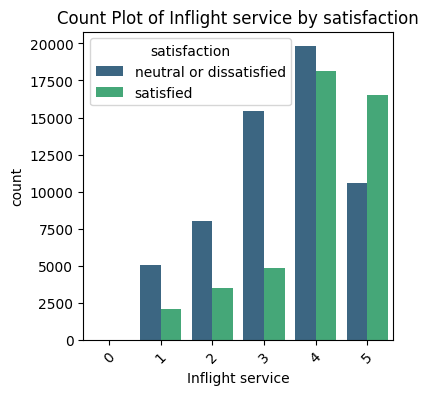

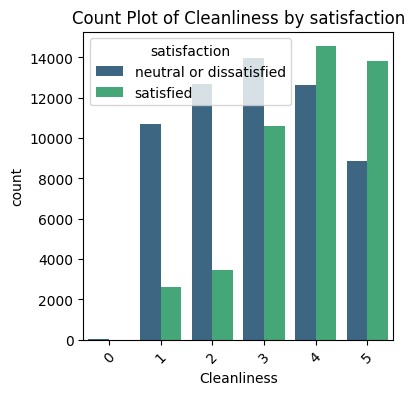

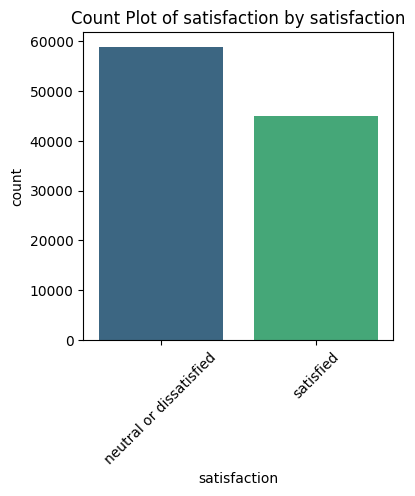

In [55]:
target_column = 'satisfaction'

# Numerical vs Target
for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[target_column] , y=df[col] , palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs Target
for col in categorical_columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df[col] , hue=df[target_column] , palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

## Multivariate EDA

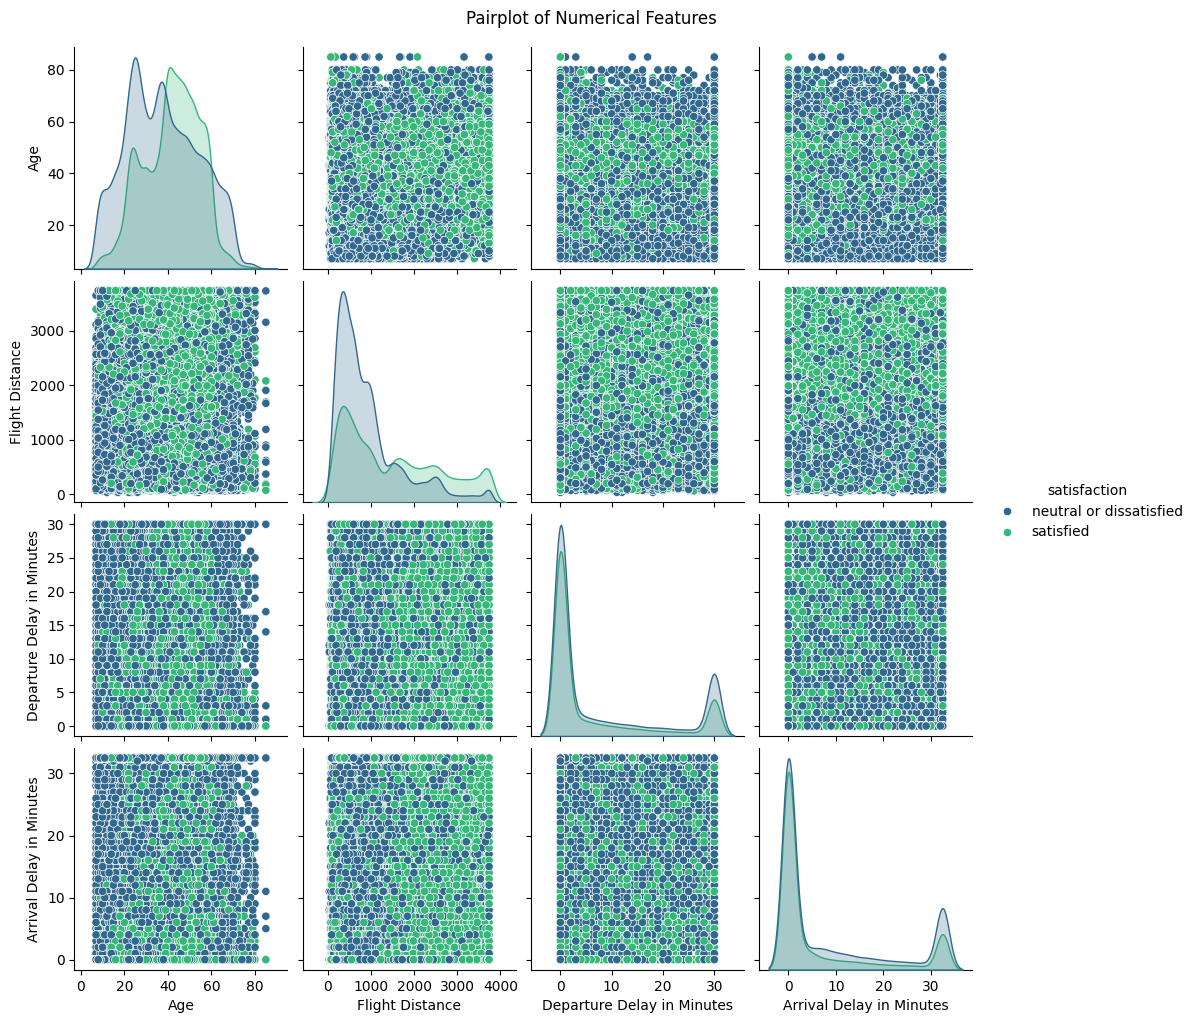

In [56]:
sns.pairplot(df[numerical_columns + [target_column]] , hue = target_column , palette='viridis')
plt.suptitle('Pairplot of Numerical Features' , y=1.02)
plt.show()

## Important Insights
  1.) Majority of people who travel are from Age group 20-40 . This age group is of youngsters like students , working professionals , tourists , business man ,etc.

2.) Most of people only travel for upto 1000km distance . As only tourist people travel for long distances.

3.) Most of flights are not delayed but if they are delayed for more than 30mins . Generally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time

4.) Female travels slightly more than males

5.) Most of flight customers are loyal which means they have taken the flight previously too

6.) Most of people travel for business purpose

7.) Most people travel in Business and eco class . Eco Plus price is generally between these two classes and just offers some basic amenties like leg-room ,etc which many people find valuable enough

8.) Flight wifi service is average it should be make better.

9.) They should focus on their online booking technology as people are facing problem due to this

10.) Seat Comfort and Inflight service is also not that good

# Feature Engineering

In [57]:
# Make a new column using feature construction ( Domain Knowledge)
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [58]:
df['Delay Ratio'] = df['Total Delay'] / (df['Flight Distance'] +1)

In [59]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275


In [60]:
# Convert Age using Binning
df['Age Group'] = pd.cut(df['Age'] , bins=[0,18,30,50,100] , labels = ['Child' , 'Youngster' , 'Adult' , 'Senior'])

In [61]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,Child


In [62]:
df.dtypes

Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                  object
Flight Distance                       float64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                       float64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [64]:
# Label Encoding on object data types
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_encode = ['Gender' , 'Customer Type' , 'Type of Travel' , 'Class' , 'satisfaction' , 'Age Group']
label_mappings ={}
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_ , le.transform(le.classes_)))

for col , mapping in label_mappings.items():
    print(f'Mapping for {col} : {mapping}')

Mapping for Gender : {'Female': 0, 'Male': 1}
Mapping for Customer Type : {'Loyal Customer': 0, 'disloyal Customer': 1}
Mapping for Type of Travel : {'Business travel': 0, 'Personal Travel': 1}
Mapping for Class : {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Mapping for satisfaction : {'neutral or dissatisfied': 0, 'satisfied': 1}
Mapping for Age Group : {'Adult': 0, 'Child': 1, 'Senior': 2, 'Youngster': 3}


In [67]:
df.dtypes
# Sab integer ya float ban gaye hai

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [69]:
# Feature Selection
from sklearn.model_selection import train_test_split
X=df.drop(columns = 'satisfaction')
y=df['satisfaction']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [71]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mututal information
mutual_info = mutual_info_classif(X_train , y_train , discrete_features=True)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({
    'Feature' : X.columns , 
    'Mutual Information' : mutual_info
}).sort_values(by='Mutual Information' , ascending = False)

mutual_info_df

,Feature,Mutual Information
11,Online boarding,0.211611
23,Delay Ratio,0.190751
6,Inflight wifi service,0.161543
4,Class,0.134969
3,Type of Travel,0.113675
13,Inflight entertainment,0.092882
5,Flight Distance,0.084806
12,Seat comfort,0.078537
15,Leg room service,0.060404
14,On-board service,0.057027


### Delay Ratio jo hamne khud se feature construction se banaya tha wo top 2 important feature mai hai

In [72]:
# Create our final dataframe with important features
top_features = mutual_info_df.head(12)['Feature'].tolist()

In [73]:
final_df = df[top_features + ['satisfaction']]

In [74]:
final_df.head(3)

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,0.093275,3,2,1,5,460.0,5,3,4,3,5,0
1,3,0.029661,3,0,0,1,235.0,1,5,1,3,1,0
2,5,0.000000,2,0,0,5,1142.0,5,3,4,2,5,1


In [75]:
# Checking Imbalanced Dataset
final_df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

# Model Training

In [76]:
final_df.columns

Index(['Online boarding', 'Delay Ratio', 'Inflight wifi service', 'Class',
       'Type of Travel', 'Inflight entertainment', 'Flight Distance',
       'Seat comfort', 'Leg room service', 'On-board service',
       'Ease of Online booking', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Sample 5% of the data
df_sample = final_df.sample(frac=0.05 , random_state=42)

# Prepare the Sample Data
X_sample = final_df.drop(columns='satisfaction')
y_sample = final_df['satisfaction']

# Split the sampled data
X_train_sample , X_test_sample , y_train_sample , y_test_sample = train_test_split(X_sample , y_sample , test_size=0.2 , random_state=42)

In [82]:
# Initialize Classifiers
classifiers = {
    'Logistic Regression ' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(n_estimators=50 , n_jobs=-1) ,
    'Gradient Boosting ' : GradientBoostingClassifier(n_estimators=50) ,
    'AdaBoost' : AdaBoostClassifier(n_estimators=50) ,
    'Support Vector Classifier ' : SVC() , 
    'K-nearest neighbours ' : KNeighborsClassifier() , 
    'Naive Bayes ' : GaussianNB(),
    'Decision Tree ' : DecisionTreeClassifier() , 
    'LGBM' : lgb.LGBMClassifier() , 
    'XGBoost' : xgb.XGBClassifier(eval_metrics = 'mlogloss')
}

In [83]:
# Train & Evaluate each classifier
results = {}
for name , clf in classifiers.items():
    clf.fit(X_train_sample , y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample , y_pred)
    results[name] = accuracy

# Print results
for name , accuracy in results.items():
    print(f'{name} : {accuracy :.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Logistic Regression  : 0.8218
Random Forest : 0.9436
Gradient Boosting  : 0.9213
AdaBoost : 0.9101
Support Vector Classifier  : 0.6652
K-nearest neighbours  : 0.8616
Naive Bayes  : 0.8528
Decision Tree  : 0.9212
LGBM : 0.9438
XGBoost : 0.9442


In [84]:
# LGBM is best as it will be fast compared to XGBoost

In [87]:
# Making LGBM Model
X=final_df.drop(columns='satisfaction')
y=final_df['satisfaction']

In [88]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [89]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train , y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [90]:
y_pred = lgbm_model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred , average='weighted') # Use weighted average for multi-class
recall = recall_score(y_test , y_pred , average='weighted')
f1 = f1_score(y_test , y_pred , average='weighted')

In [92]:
print(f'Accuracy : {accuracy :.4f}')
print(f'Precision : {precision :.4f}')
print(f'Recall : {recall :.4f}')
print(f'F1 score : {f1 :.4f}')

Accuracy : 0.9438
Precision : 0.9441
Recall : 0.9438
F1 score : 0.9437


In [94]:
# We will not do hyperparameter tuning as there was a risk of overfitting as model is already performing quite good

# Model Saving

In [96]:
import pickle
with open('lgbm_model.pkl' , 'wb') as file:
    pickle.dump(lgbm_model , file)

# Model Loading And testing

In [97]:
with open('lgbm_model.pkl' , 'rb') as file:
    loaded_model = pickle.load(file)

In [99]:
X_train[8:10]

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness
84550,5,0.0,4,0,0,2,3736.5,5,2,2,4,3
17315,2,0.0,2,1,1,3,986.0,3,4,4,2,3


In [100]:
y_train[8:10]

84550    1
17315    0
Name: satisfaction, dtype: int32

In [101]:
X_new = np.array([[5	,0.0,	4	,0,	0	,2	,3736.5	,5	,2,	2	,4	,3] ,
                  [2	,0.0	,2	,1	,1	,3	,986.0	,3	,4	,4	,2	,3]])

In [103]:
y_pred_new = loaded_model.predict(X_new)

In [104]:
print('Predictions :' , y_pred_new)

Predictions : [1 0]


### Model is doing good Predictions